In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pred_etudiants = read_file('pred-etudiants.px')
pred_etudiants.index.names = ['scenario', 'uni','filiere','diplome', 'nationalite', 'annee']
pred_etudiants.head()

Etudiants  \
scenario              uni       filiere                        diplome  nationalite                 annee             
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015        289   
                                                                                                    2016        283   
                                                                                                    2017        289   
                                                                                                    2018        299   
                                                                                                    2019        303   

                                                                                                          Premiers titres  
scenario              uni       filiere                        diplome  nationalite                 annee                  
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015               61  
                                                                                                    2016               58  
                                                                                                    2017               50  
                                                                                                    2018               50  
                                                                                                    2019               53

In [3]:
type_filiere = list(pred_etudiants.index.get_level_values('filiere').unique())
years = list(pred_etudiants.index.get_level_values('annee').unique())
scenarios = list(pred_etudiants.index.get_level_values('scenario').unique())
unis = list(pred_etudiants.index.get_level_values('uni').unique())
diplomes = list(pred_etudiants.index.get_level_values('diplome').unique())
nationalite = list(pred_etudiants.index.get_level_values('nationalite').unique())

In [4]:
pred_etudiants = parse_df(pred_etudiants,0)

In [5]:
pred_etudiants.columns

Index(['Etudiants', 'Premiers titres'], dtype='object')

In [6]:
pred_etudiants = pred_etudiants.groupby(['scenario', 'uni', 'nationalite', 'annee']).sum()
pred_etudiants = pred_etudiants.drop(labels = 'Premiers titres', axis = 1)
pred_etudiants.head()

Etudiants
scenario      uni                                nationalite                 annee           
Scenario base Autres institutions universitaires Certificat d'acces etranger 2015       336.0
                                                                             2016       342.0
                                                                             2017       349.0
                                                                             2018       356.0
                                                                             2019       350.0

In [13]:
def get_df_for_uni(uni, summarized = False):
    uni_df = pd.DataFrame(columns = ['ET-bas','CH-bas','ET-ref','CH-ref','ET-haut','CH-haut'])
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    
    tmp_df = pred_etudiants.xs(uni, level = 'uni')
    for y in years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()['Etudiants'])
    return uni_df

In [14]:
get_df_for_uni('EPF Lausanne').head()

,ET-bas,CH-bas,ET-ref,CH-ref,ET-haut,CH-haut
annee,,,,,,
2015,3346,4096,3346,4096,3346,4096
2016,3408,4106,3471,4130,3536,4153
2017,3402,4175,3515,4216,3639,4255
2018,3339,4245,3490,4300,3662,4351
2019,3300,4309,3492,4375,3715,4437


In [15]:
def plot_for_uni(uni):
    tmp_df = get_df_for_uni(uni)
    x = [int(y) for y in years]
    plt.plot(years, tmp_df['CH-ref'],
            years, tmp_df['ET-ref'])
    plt.fill_between(x, tmp_df['CH-haut'], tmp_df['CH-bas'], facecolor='red', alpha = .2)
    plt.fill_between(x, tmp_df['ET-haut'], tmp_df['ET-bas'], facecolor='blue', alpha = .2)
    plt.show()

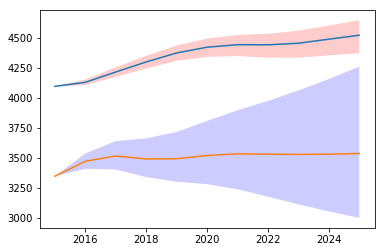

In [16]:
plot_for_uni('EPF Lausanne')